In [1]:
#http://statmodeling.hatenablog.com/entry/pystan-rstanbook-chap5-1
from pystan import StanModel
import pystan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
d = pd.read_csv('data-attendance-1.txt')
d.Score/=200
data = d.to_dict('list')
data['N'] = len(d)
data;

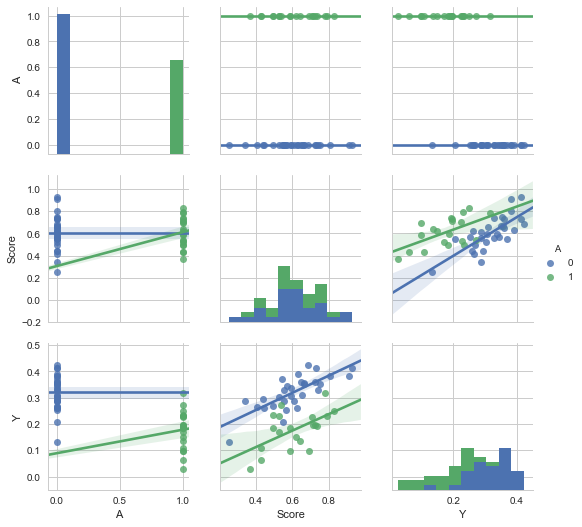

In [3]:
sns.pairplot(d, hue='A', kind='reg');

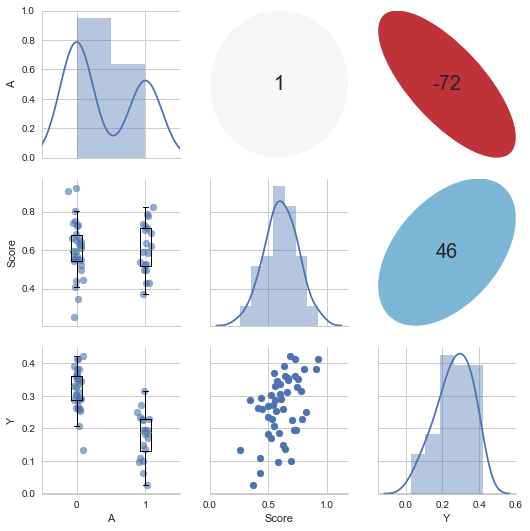

In [6]:
%run Dispatcher.py
g = sns.PairGrid(d, diag_sharey=False)
d_plot = Dispatcher()
# 対角成分
g.map_diag(d_plot.diag)
# 下三角成分
g.map_lower(d_plot.comb);
# 上三角成分
g.map_upper(d_plot.ellipse);

In [7]:
stanmodel = StanModel(file='model5-3.stan')

In [8]:
fit = stanmodel.sampling(data=data, seed=123, thin = 1, warmup=300, n_jobs=-1)

In [9]:
fit

Inference for Stan model: anon_model_b4887a48e6b04920314d57853da55e42.
4 chains, each with iter=2000; warmup=300; thin=1; 
post-warmup draws per chain=1700, total post-warmup draws=6800.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
b1           0.12  6.0e-4   0.03   0.06    0.1   0.12   0.14   0.19   2969    1.0
b2          -0.14  2.1e-4   0.01  -0.17  -0.15  -0.14  -0.13  -0.12   4932    1.0
b3           0.33  9.5e-4   0.05   0.23   0.29   0.33   0.36   0.43   2978    1.0
sigma        0.05  9.1e-5 5.6e-3   0.04   0.05   0.05   0.06   0.06   3718    1.0
mu[0]        0.24  2.9e-4   0.02    0.2   0.22   0.24   0.25   0.27   3297    1.0
mu[1]        0.22  1.9e-4   0.01   0.19   0.21   0.22   0.22   0.24   4614    1.0
mu[2]        0.33  1.2e-4 9.4e-3   0.31   0.32   0.33   0.33   0.35   6417    1.0
mu[3]        0.12  2.3e-4   0.01   0.09   0.11   0.12   0.13   0.15   4140    1.0
mu[4]        0.24  2.3e-4   0.01   0.21   0.23   0.24   0.25   0.27   4127

In [10]:
from scipy.stats import gaussian_kde
def find_map(data):
    kde = gaussian_kde(data)
    x_range = np.linspace(data.min(), data.max(), 501)
    eval_kde = kde.evaluate(x_range)
    return x_range[np.argmax(eval_kde)]

In [12]:
map = []
fit.model_pars.append("lp__")
for i in fit.model_pars:
    print(i)
    if i in fit.constrained_param_names() or i == 'lp__':
        map.append(find_map(fit[i]))
    else:
        for j in range(0, fit[i].shape[1]):
            map.append(find_map(fit[i][:, j]))

b1
b2
b3
sigma
mu
y_pred
lp__


In [15]:
def stanfit_to_dataframe(fit):
    summary = fit.summary()
    columns = summary['summary_colnames']
    index = summary['summary_rownames']
    data = summary['summary']
    return pd.DataFrame(data, index, columns)

In [16]:
fitdf = stanfit_to_dataframe(fit)
fitdf["map"] = map
fitdf

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat,map
b1,0.122651,0.000602,0.032789,0.057055,0.100509,0.122962,0.144759,0.186170,2969.0,0.999969,0.124599
b2,-0.143719,0.000208,0.014576,-0.171918,-0.153715,-0.143481,-0.133931,-0.115134,4932.0,1.000063,-0.142106
b3,0.326348,0.000948,0.051730,0.226237,0.291039,0.325841,0.361142,0.429458,2978.0,0.999884,0.324134
sigma,0.051703,0.000091,0.005573,0.042154,0.047790,0.051226,0.055079,0.063811,3718.0,0.999699,0.050901
mu[0],0.235241,0.000287,0.016499,0.202168,0.224215,0.235622,0.246330,0.266828,3297.0,1.000094,0.237183
mu[1],0.215535,0.000188,0.012771,0.191433,0.206969,0.215265,0.224072,0.241129,4614.0,1.000003,0.214831
mu[2],0.326618,0.000118,0.009428,0.308317,0.320150,0.326533,0.332840,0.345614,6417.0,1.000214,0.327842
mu[3],0.119262,0.000231,0.014883,0.089886,0.109246,0.119391,0.129174,0.148653,4140.0,0.999892,0.121500
mu[4],0.236747,0.000227,0.014589,0.209044,0.226869,0.236465,0.246395,0.265897,4127.0,0.999993,0.234524
mu[5],0.339672,0.000124,0.009846,0.320434,0.332868,0.339649,0.346248,0.359337,6288.0,1.000146,0.340109


In [17]:
fitdf_mu = fitdf.loc['mu[0]': 'mu[49]']
fitdf_pred = fitdf.loc['y_pred[0]': 'y_pred[49]']

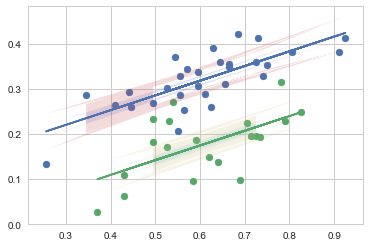

In [18]:
plt.plot(d[d.A==0].Score, fitdf_mu[d["A"].values==0]["mean"])
plt.scatter(d[d["A"]==0].Score, d[d["A"]==0].Y)
plt.plot(d[d.A==1].Score, fitdf_mu[d["A"].values==1]["mean"])
plt.scatter(d[d["A"]==1].Score, d[d["A"]==1].Y)
plt.fill_between(d[d.A==0]['Score'], fitdf_mu[d["A"].values==0]['2.5%'],  fitdf_mu[d["A"].values==0]['97.5%'], alpha=0.2)
plt.fill_between(d[d.A==0]['Score'], fitdf_mu[d["A"].values==0]['25%'],  fitdf_mu[d["A"].values==0]['75%'], alpha=0.2)
plt.fill_between(d[d.A==1]['Score'], fitdf_mu[d["A"].values==1]['2.5%'],  fitdf_mu[d["A"].values==1]['97.5%'], alpha=0.2)
plt.fill_between(d[d.A==1]['Score'], fitdf_mu[d["A"].values==1]['25%'],  fitdf_mu[d["A"].values==1]['75%'], alpha=0.2)

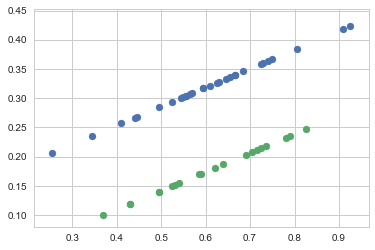

In [45]:
plt.scatter(d[d.A==0].Score, fitdf_mu[d["A"].values==0]["mean"])
plt.scatter(d[d.A==1].Score, fitdf_mu[d["A"].values==1]["mean"])

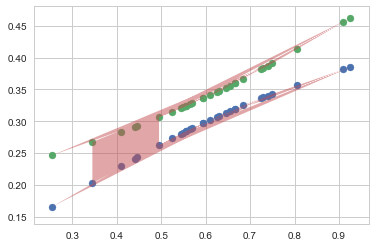

In [43]:
plt.scatter(d[d["A"].values==0]['Score'], fitdf_mu[d["A"].values==0]['2.5%'])
plt.scatter(d[d["A"].values==0]['Score'], fitdf_mu[d["A"].values==0]['97.5%'])
plt.fill_between(d[d["A"].values==0]['Score'], fitdf_mu[d["A"].values==0]['2.5%'], fitdf_mu[d["A"].values==0]['97.5%'], alpha=0.5)

In [158]:
fitdf_mu[d["A"].values==0][['2.5%','97.5%']];

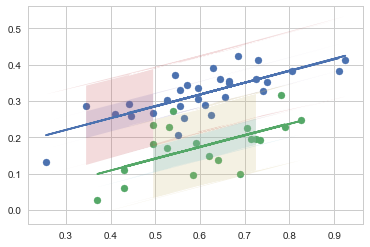

In [22]:
plt.plot(d[d.A==0].Score, fitdf_pred[d["A"].values==0]["mean"])
plt.scatter(d[d["A"]==0].Score, d[d["A"]==0].Y)
plt.plot(d[d.A==1].Score, fitdf_pred[d["A"].values==1]["mean"])
plt.scatter(d[d["A"]==1].Score, d[d["A"]==1].Y)
plt.fill_between(d[d.A==0].Score, fitdf_pred[d["A"].values==0]['2.5%'],  fitdf_pred[d["A"].values==0]['97.5%'], alpha=0.2)
plt.fill_between(d[d.A==0].Score, fitdf_pred[d["A"].values==0]['25%'],  fitdf_pred[d["A"].values==0]['75%'], alpha=0.2)
plt.fill_between(d[d.A==1].Score, fitdf_pred[d["A"].values==1]['2.5%'],  fitdf_pred[d["A"].values==1]['97.5%'], alpha=0.2)
plt.fill_between(d[d.A==1].Score, fitdf_pred[d["A"].values==1]['25%'],  fitdf_pred[d["A"].values==1]['75%'], alpha=0.2)

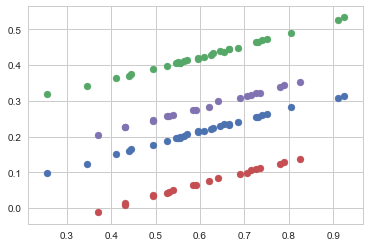

In [20]:
plt.scatter(d[d.A==0].Score,fitdf_pred[d["A"].values==0]['2.5%'])
plt.scatter(d[d.A==0].Score,fitdf_pred[d["A"].values==0]['97.5%'])
plt.scatter(d[d.A==1].Score,fitdf_pred[d["A"].values==1]['2.5%'])
plt.scatter(d[d.A==1].Score,fitdf_pred[d["A"].values==1]['97.5%'])

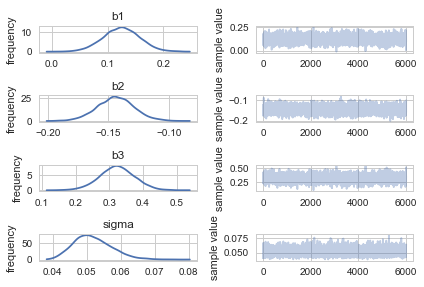

In [29]:
fit.traceplot(pars=['b1', 'b2','b3', 'sigma']).tight_layout()

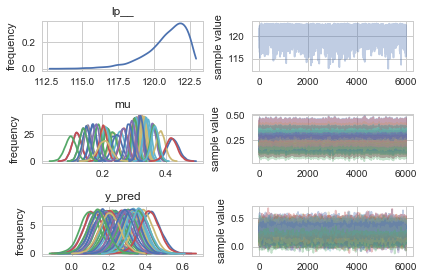

In [31]:
fit.traceplot(pars=['lp__','mu', 'y_pred']).tight_layout()

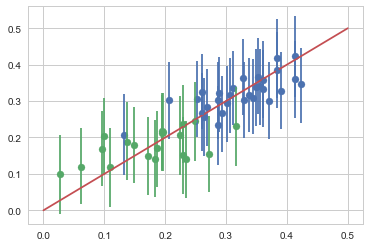

In [196]:
plt.scatter(d[d.A==0].Y, fitdf_pred[d["A"].values==0]["mean"])
plt.scatter(d[d.A==1].Y, fitdf_pred[d["A"].values==1]["mean"])
dy0_1 = fitdf_pred[d["A"].values==0]['50%'] - fitdf_pred[d["A"].values==0]['2.5%']
dy0_2 = fitdf_pred[d["A"].values==0]['97.5%'] - fitdf_pred[d["A"].values==0]['50%']
dy1_1 = fitdf_pred[d["A"].values==1]['50%'] - fitdf_pred[d["A"].values==1]['2.5%']
dy1_2 = fitdf_pred[d["A"].values==1]['97.5%'] - fitdf_pred[d["A"].values==1]['50%']
plt.errorbar(d[d.A==0].Y, fitdf_pred[d["A"].values==0]["mean"], yerr=[dy0_1, dy0_2], fmt='.');
plt.errorbar(d[d.A==1].Y, fitdf_pred[d["A"].values==1]["mean"], yerr=[dy1_1, dy1_2], fmt='.');
plt.plot(np.linspace(0, 0.5), np.linspace(0, 0.5))

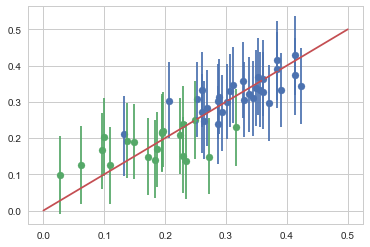

In [20]:
plt.scatter(d[d.A==0].Y, fitdf_pred[d["A"].values==0]["map"])
plt.scatter(d[d.A==1].Y, fitdf_pred[d["A"].values==1]["map"])
dy0_1 = fitdf_pred[d["A"].values==0]['50%'] - fitdf_pred[d["A"].values==0]['2.5%']
dy0_2 = fitdf_pred[d["A"].values==0]['97.5%'] - fitdf_pred[d["A"].values==0]['50%']
dy1_1 = fitdf_pred[d["A"].values==1]['50%'] - fitdf_pred[d["A"].values==1]['2.5%']
dy1_2 = fitdf_pred[d["A"].values==1]['97.5%'] - fitdf_pred[d["A"].values==1]['50%']
plt.errorbar(d[d.A==0].Y, fitdf_pred[d["A"].values==0]["map"], yerr=[dy0_1, dy0_2], fmt='.');
plt.errorbar(d[d.A==1].Y, fitdf_pred[d["A"].values==1]["map"], yerr=[dy1_1, dy1_2], fmt='.');
plt.plot(np.linspace(0, 0.5), np.linspace(0, 0.5))

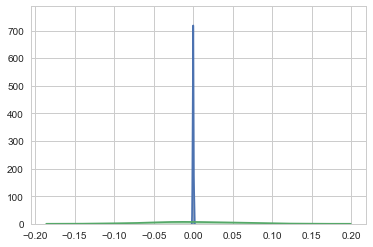

In [60]:
x = fitdf_pred['mean'].values -  fitdf_mu['mean'].values
sns.distplot(x)
ans = np.random.normal(0,fitdf["mean"]["sigma"], 100)
sns.distplot(ans)

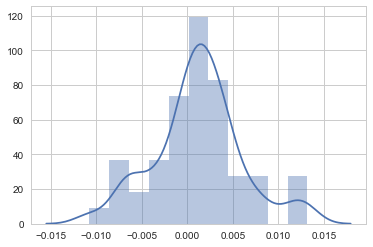

In [19]:
x = fitdf_pred['map'].values -  fitdf_mu['map'].values
sns.distplot(x);

In [42]:
d

array([[-0.00734451,  0.018418  ,  0.00068301, ...,  0.06885744,
        -0.04679391,  0.04491263],
       [-0.04744444,  0.05514702,  0.01212789, ...,  0.06633916,
        -0.02530034,  0.10961874],
       [-0.02255129,  0.05259336,  0.10715076, ...,  0.0226148 ,
         0.07653811, -0.00044635],
       ..., 
       [-0.10130474,  0.05528473,  0.0659445 , ..., -0.00680751,
         0.0155149 ,  0.00832627],
       [ 0.03630616, -0.01563456,  0.04286977, ...,  0.02670965,
        -0.07005721, -0.08958508],
       [ 0.04904872, -0.0280337 , -0.03749325, ..., -0.00673158,
        -0.07339701,  0.00467269]])

(array([  3.,   5.,   4.,   9.,  10.,   9.,   4.,   2.,   2.,   2.]),
 array([ -1.29577142e-03,  -1.03977134e-03,  -7.83771249e-04,
         -5.27771162e-04,  -2.71771074e-04,  -1.57709861e-05,
          2.40229102e-04,   4.96229189e-04,   7.52229277e-04,
          1.00822936e-03,   1.26422945e-03]),
 <a list of 10 Patch objects>)

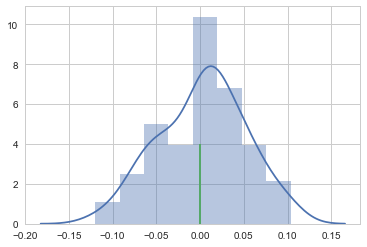

In [61]:
ans = np.random.normal(0,fitdf["mean"]["sigma"], 100)
sns.distplot(ans)
plt.hist(x)

In [94]:
mc = fit.extract()
df = pd.DataFrame({"b1":mc['b1'], "b2":mc["b2"], "b3":mc["b3"], 
              "sigma":mc["sigma"], "mu1":mc["mu"][:, 0], "mu50":mc["mu"][:, 49],
             "lp__":mc["lp__"]})
df

,b1,b2,b3,lp__,mu1,mu50,sigma
0,0.089499,-0.137711,0.384881,121.748998,0.222283,0.142304,0.053208
1,0.060358,-0.147498,0.419795,120.755338,0.205188,0.120659,0.051547
2,0.133557,-0.146160,0.303013,122.616352,0.238096,0.137388,0.051226
3,0.122158,-0.130753,0.303002,120.767627,0.226694,0.141391,0.058050
4,0.105155,-0.146460,0.346369,122.334732,0.224652,0.130147,0.047577
5,0.155730,-0.151251,0.303831,119.751340,0.260551,0.154875,0.056839
6,0.064035,-0.160645,0.431019,117.451919,0.212737,0.116745,0.067417
7,0.109557,-0.153073,0.359111,122.092204,0.233450,0.134243,0.054099
8,0.146718,-0.155183,0.284965,119.870529,0.245031,0.132593,0.041375
9,0.154256,-0.159328,0.269144,120.847109,0.247110,0.128154,0.053490


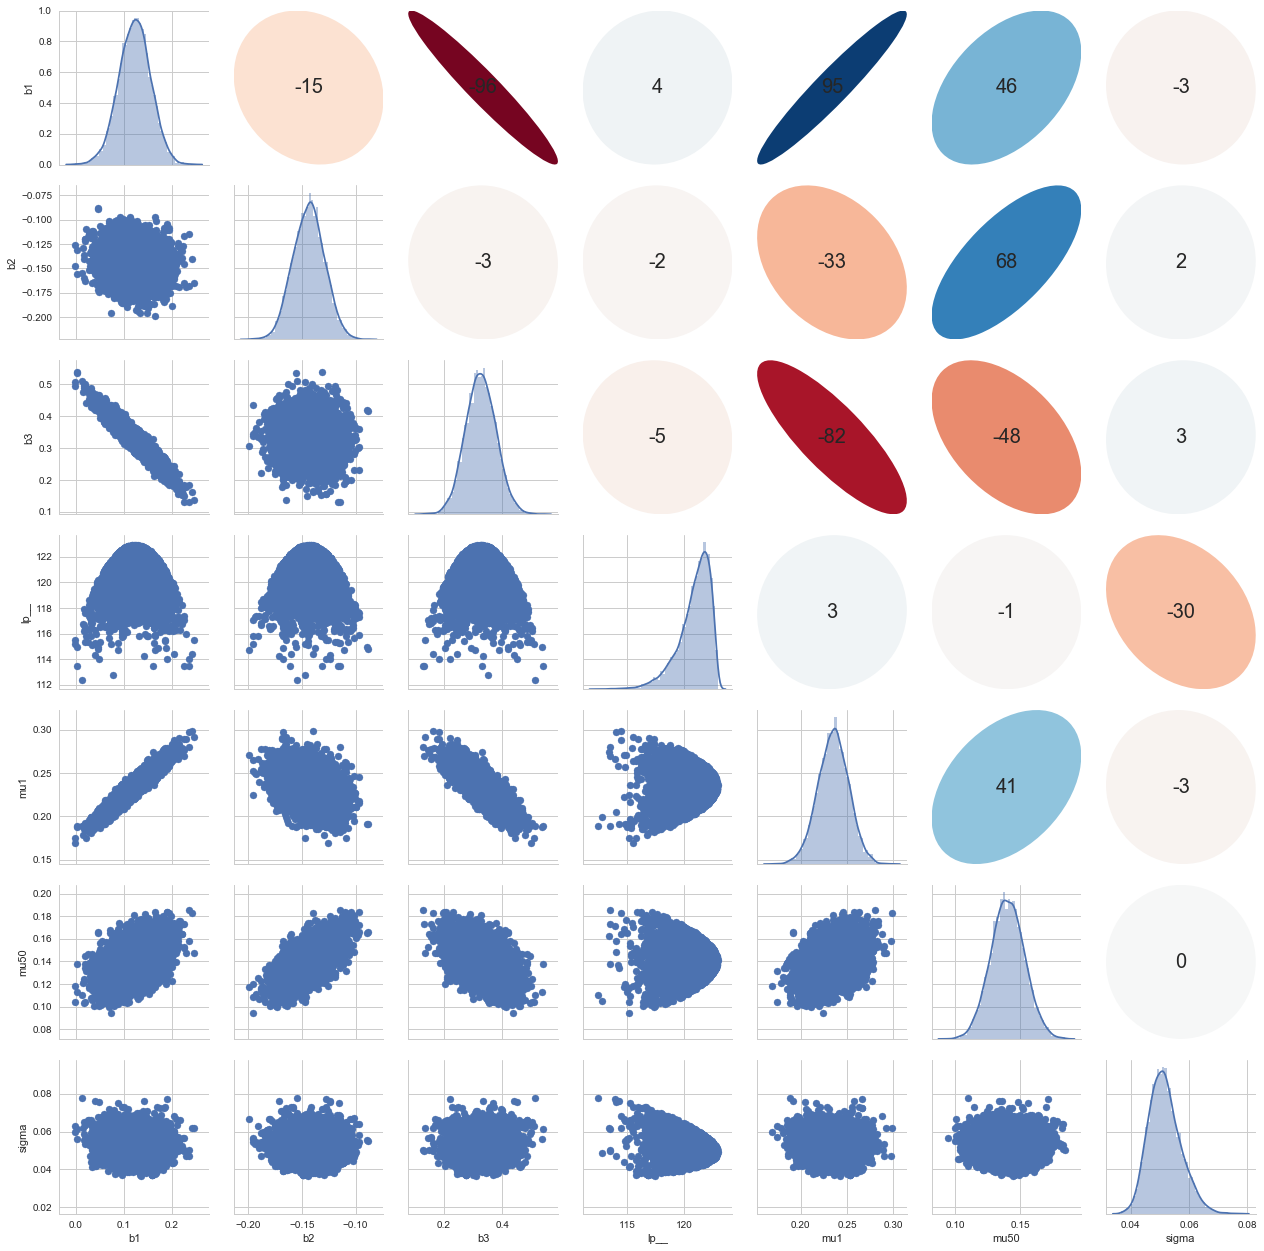

In [95]:
g = sns.PairGrid(df, diag_sharey=False)
d_plot = Dispatcher()
# 対角成分
g.map_diag(d_plot.diag)
# 下三角成分
g.map_lower(d_plot.comb);
# 上三角成分
g.map_upper(d_plot.ellipse);

In [97]:
pd.DataFrame(fit.extract(pars=['b1', 'b2', 'b3']))

,b1,b2,b3
0,0.089499,-0.137711,0.384881
1,0.060358,-0.147498,0.419795
2,0.133557,-0.146160,0.303013
3,0.122158,-0.130753,0.303002
4,0.105155,-0.146460,0.346369
5,0.155730,-0.151251,0.303831
6,0.064035,-0.160645,0.431019
7,0.109557,-0.153073,0.359111
8,0.146718,-0.155183,0.284965
9,0.154256,-0.159328,0.269144
